In [1]:
def encoder_block(inputs, num_filters):

	# Convolution with 3x3 filter followed by ReLU activation
	x = tf.keras.layers.Conv2D(num_filters,
							3,
							padding = 'valid')(inputs)
	x = tf.keras.layers.Activation('relu')(x)

	# Convolution with 3x3 filter followed by ReLU activation
	x = tf.keras.layers.Conv2D(num_filters,
							3,
							padding = 'valid')(x)
	x = tf.keras.layers.Activation('relu')(x)

	# Max Pooling with 2x2 filter
	x = tf.keras.layers.MaxPool2D(pool_size = (2, 2),
								strides = 2)(x)

	return x

In [2]:
def decoder_block(inputs, skip_features, num_filters):

	x = tf.keras.layers.Conv2DTranspose(num_filters,
										(2, 2),
										strides = 2,
										padding = 'valid')(inputs)

	skip_features = tf.image.resize(skip_features,
									size = (x.shape[1],
											x.shape[2]))
	x = tf.keras.layers.Concatenate()([x, skip_features])

	x = tf.keras.layers.Conv2D(num_filters,
							3,
							padding = 'valid')(x)
	x = tf.keras.layers.Activation('relu')(x)

	x = tf.keras.layers.Conv2D(num_filters, 3, padding = 'valid')(x)
	x = tf.keras.layers.Activation('relu')(x)

	return x

In [3]:
import tensorflow as tf

def encoder_block(input_tensor, num_filters):
    """Encoder block: Conv2D -> ReLU -> Conv2D -> ReLU -> MaxPooling."""
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(input_tensor)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    p = tf.keras.layers.MaxPooling2D((2, 2))(x)
    return x, p

def decoder_block(input_tensor, skip_tensor, num_filters):
    """Decoder block: UpSampling2D -> Conv2D -> Concatenate -> Conv2D -> ReLU."""
    x = tf.keras.layers.UpSampling2D((2, 2))(input_tensor)
    x = tf.keras.layers.Conv2D(num_filters, 2, padding="same")(x)
    x = tf.keras.layers.Concatenate()([x, skip_tensor])
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    x = tf.keras.layers.Conv2D(num_filters, 3, padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    return x

def unet_model(input_shape=(256, 256, 3), num_classes=2):
    """U-Net model."""
    inputs = tf.keras.layers.Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = tf.keras.layers.Conv2D(1024, 3, padding="same")(p4)
    b1 = tf.keras.layers.Activation("relu")(b1)
    b1 = tf.keras.layers.Conv2D(1024, 3, padding="same")(b1)
    b1 = tf.keras.layers.Activation("relu")(b1)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = tf.keras.layers.Conv2D(num_classes, 1, padding="same", activation="sigmoid")(d4)

    model = tf.keras.models.Model(inputs=inputs, outputs=outputs, name="U-Net")
    return model

model = unet_model(input_shape=(256, 256, 3), num_classes=2)
model.summary()

Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ conv2d_1[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ conv2d_3[0][0]    │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ activation_4[0][… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│ (Activation)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ activation_5[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[

 Total params: 31,031,810 (118.38 MB)

 Trainable params: 31,031,810 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


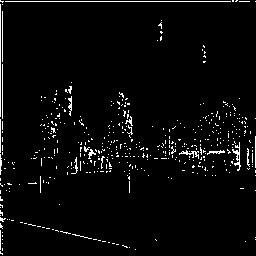

In [7]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

img = Image.open('img.jpg')
img = img.resize((256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array[:,:,:3], axis=0)
img_array = img_array / 255.

model = unet_model(input_shape=(256, 256, 3), num_classes=2)

predictions = model.predict(img_array)

predictions = np.squeeze(predictions, axis=0)
predictions = np.argmax(predictions, axis=-1)
predictions = Image.fromarray(np.uint8(predictions*255))
predictions = predictions.resize((img.width, img.height))

predictions.save('pred_img.jpg')
predictions